In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\HM\Downloads\Pandas+Course+Files\Datasets\diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()   # checking if our data has any null or not

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
import seaborn as sns

In [6]:
import numpy as np
df["Outcome"]=np.where(df["Outcome"]==1,"Diabetic","Non-Diabetic")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


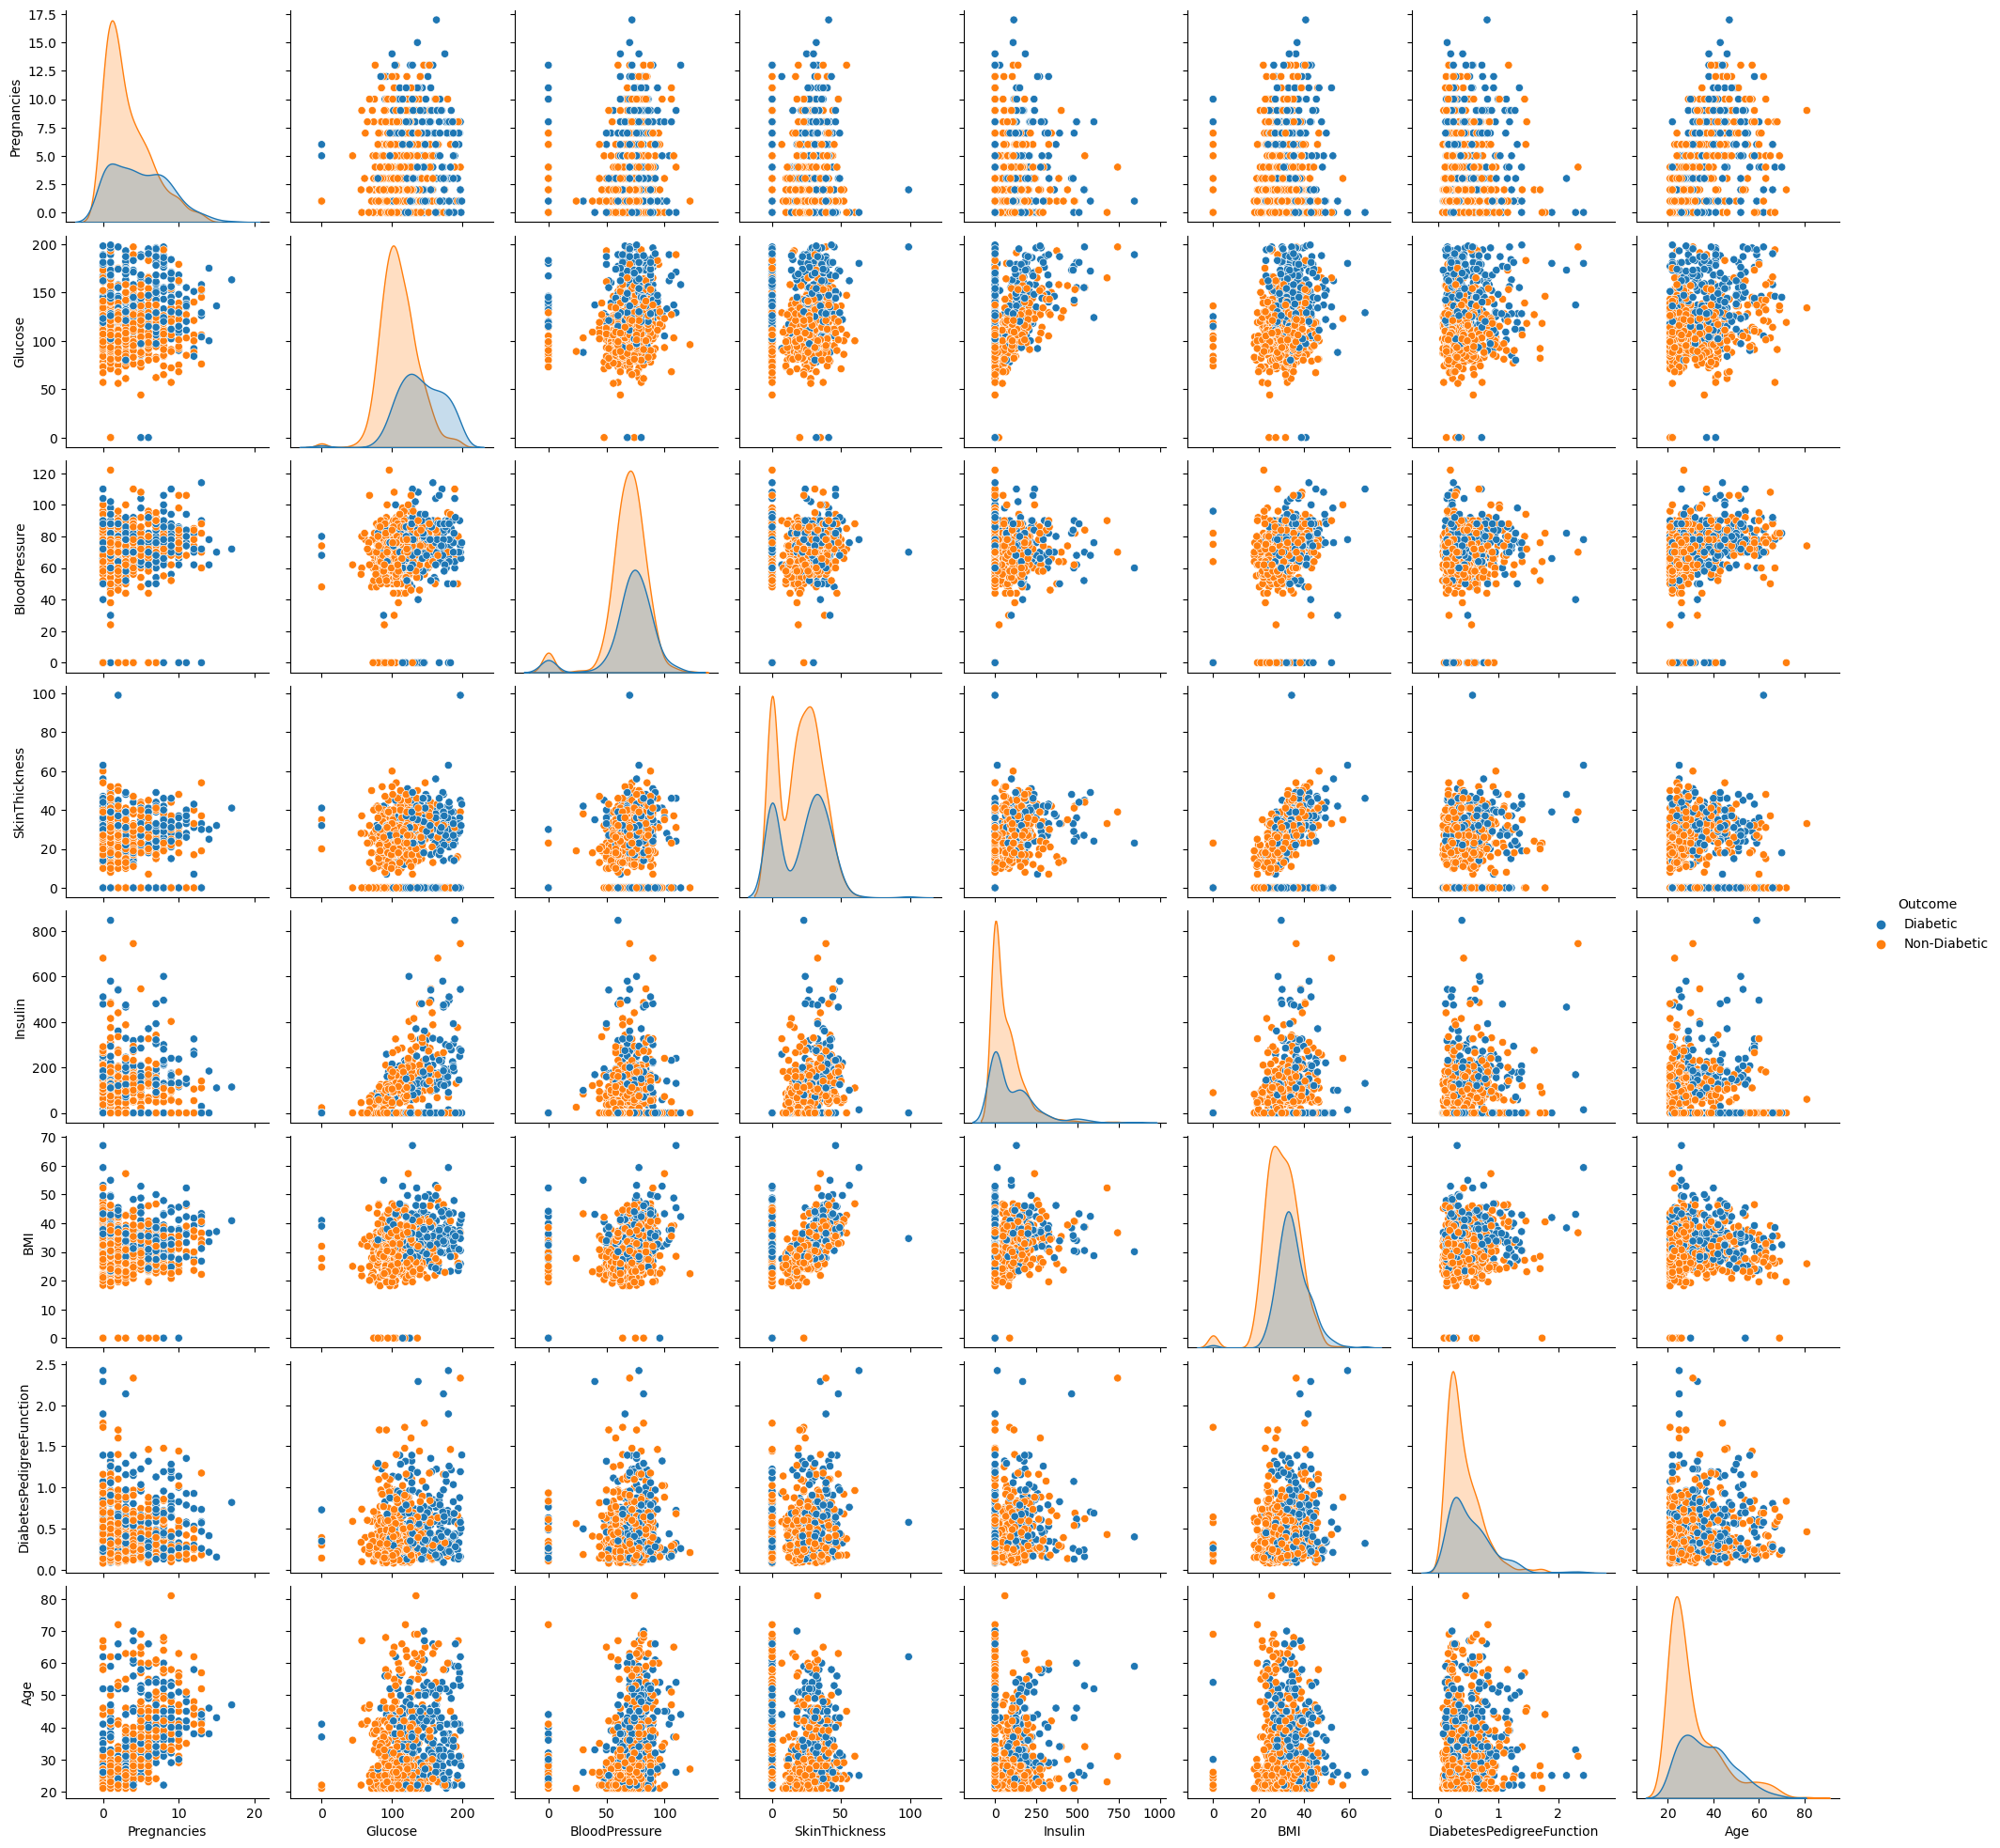

In [8]:
sns.pairplot(df,hue="Outcome")

In [9]:
df = pd.read_csv(r'C:\Users\HM\Downloads\Pandas+Course+Files\Datasets\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X=df.drop('Outcome',axis=1).values  # Independant features
y=df['Outcome'].values       # Dependant features

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
# Libraries for Pytorch

import torch
import torch.nn as nn          # Help us to create models
import torch.nn.functional as F

In [14]:
# Creating Tensor as all my dependant and independant features have to be conv to Tensor
# Independant features should be converted as FLOAT TENSOR always

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [15]:
df.shape

(768, 9)

In [27]:
# Creating Model

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,output_features=2):
        super().__init__()
        self.fully_connected1=nn.Linear(input_features,hidden1)
        self.fully_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,output_features)
    def forward (self,x):
        x=F.relu(self.fully_connected1(x))
        x=F.relu(self.fully_connected2(x))
        x=self.out(x)
        return x
        

In [28]:
# initialize ANN Model
torch.manual_seed(20)
model=ANN_Model()

In [34]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (fully_connected1): Linear(in_features=8, out_features=20, bias=True)
  (fully_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [30]:
# This was all about forward propagation

In [31]:
# Now we will do Backward Propagation

In [35]:
# we have define loss_functions and optimizer

loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01) #lr = learning rate

In [39]:
epochs=500
final_losses=[]
for i in range (epochs):
    i=i+1
    y_prediction=model.forward(X_train)
    loss=loss_function(y_prediction,y_train)   # we gave pred and train parameters bcz we are comparing them
    final_losses.append(loss)   # we append it so we can track it down
    if i%10==1:  # This mean for every 10 epoch print something
        print("Epoch Number :{} and loss : {}".format(i,loss.item()))
        
        
    # Now we have to optimize the loss aswell, for this we will use autograd
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number :1 and loss : 3.4572105407714844
Epoch Number :11 and loss : 0.8019207119941711
Epoch Number :21 and loss : 0.609032154083252
Epoch Number :31 and loss : 0.5917771458625793
Epoch Number :41 and loss : 0.5679708123207092
Epoch Number :51 and loss : 0.5529041886329651
Epoch Number :61 and loss : 0.5410094857215881
Epoch Number :71 and loss : 0.5310389995574951
Epoch Number :81 and loss : 0.5220361351966858
Epoch Number :91 and loss : 0.5135971903800964
Epoch Number :101 and loss : 0.5061254501342773
Epoch Number :111 and loss : 0.49834102392196655
Epoch Number :121 and loss : 0.49605512619018555
Epoch Number :131 and loss : 0.48286372423171997
Epoch Number :141 and loss : 0.4756035804748535
Epoch Number :151 and loss : 0.483346551656723
Epoch Number :161 and loss : 0.48827385902404785
Epoch Number :171 and loss : 0.46933698654174805
Epoch Number :181 and loss : 0.4662608802318573
Epoch Number :191 and loss : 0.45597580075263977
Epoch Number :201 and loss : 0.4466378688812256

In [47]:
# ploting loss func
import matplotlib.pyplot as plt
%matplotlib inline

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

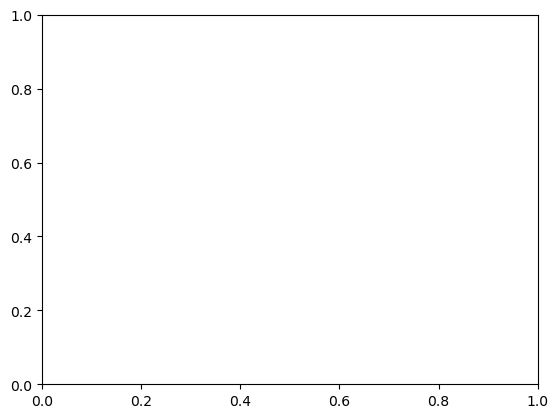

In [55]:
plt.plot(range(epochs),final_losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [66]:
### Prediction in X_test Data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())           # Model is actually whatever we want to predict
        
# argmax basiclay help me to find out which index maximum it is
# item will count it

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm         # 91 and 30 right results, 16 and 17 wrong

array([[91, 16],
       [17, 30]], dtype=int64)

Text(95.72222222222221, 0.5, 'predicted Values')

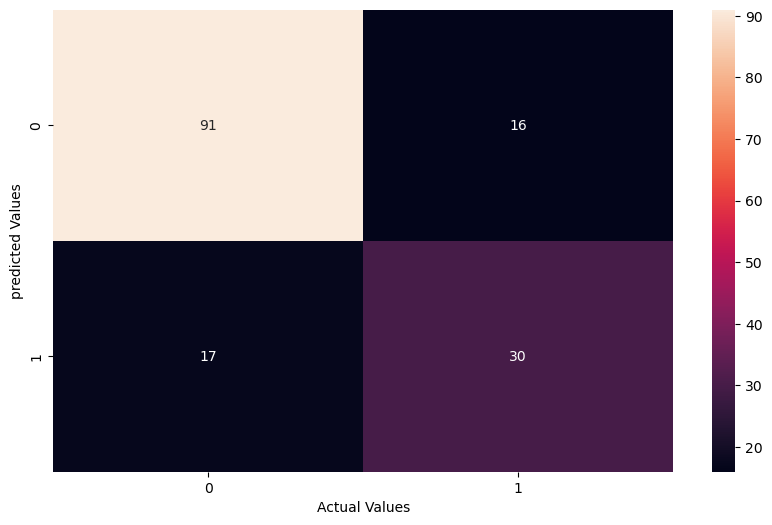

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('predicted Values')

In [73]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7857142857142857

In [74]:
torch.save(model, 'diabetes.pt')   #pt is pytorch extension

In [75]:
model=torch.load('diabetes.pt')   # Save and Load the model 

In [76]:
model.eval()

ANN_Model(
  (fully_connected1): Linear(in_features=8, out_features=20, bias=True)
  (fully_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)